In [3]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/c3/6c/ea362eef61f05553aaf1a24b3e96b2d0603f5dc71a3bd35688a24ed88843/pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---------------------------------- --- 307.2/341.8 kB 6.3 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.8 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.4/10.8 MB 3.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.8 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/10.8 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.8 MB 4.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.8 MB 4.2 MB/s eta 0:00:03
   ----- ----------------------

In [22]:
import numpy as np
import pandas as pd 

In [40]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [51]:
DATADIR = 'D:/dl/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

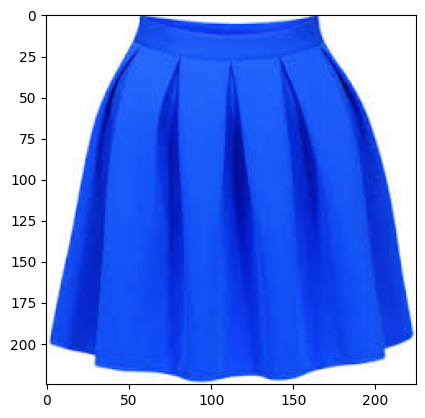

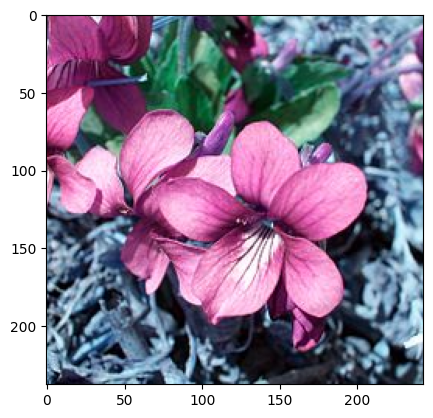

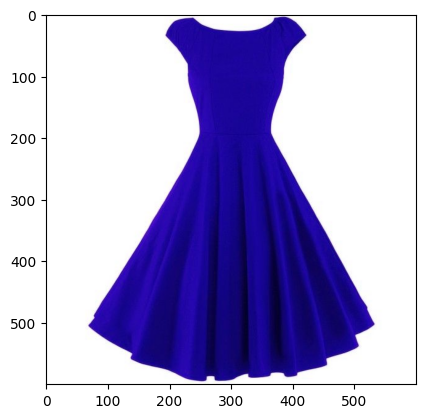

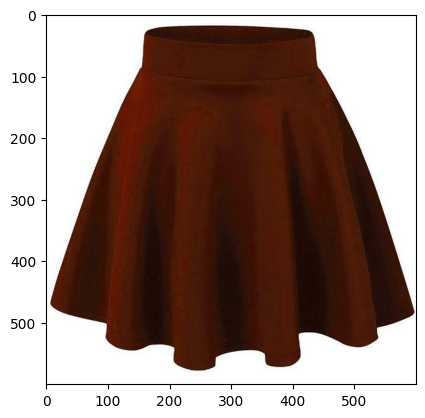

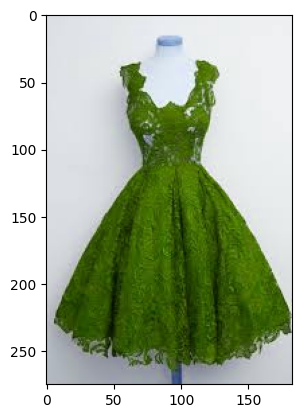

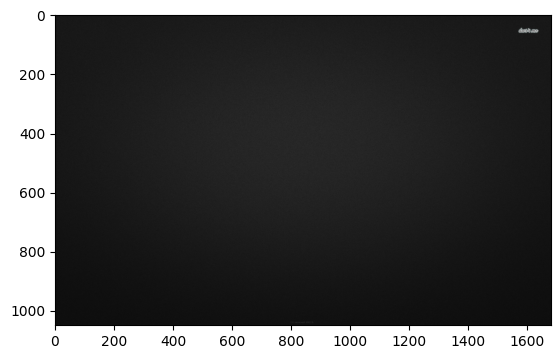

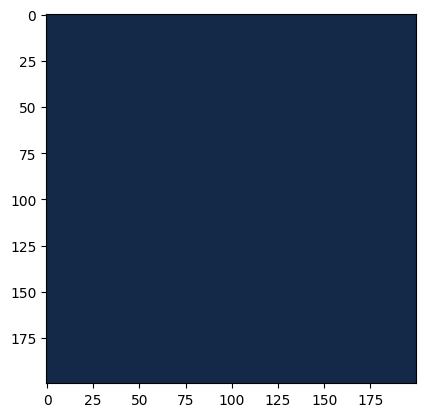

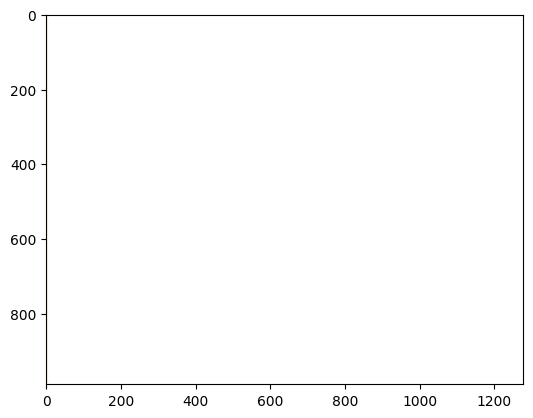

In [52]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break

In [54]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()     

In [55]:
print(len(training_data))

107


In [56]:
lenofimage = len(training_data)

In [57]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)


In [58]:
X.shape

(107, 30000)

In [59]:
X = X/255.0

In [60]:
X[1]

array([1., 1., 1., ..., 1., 1., 1.])

In [61]:
y=np.array(y)

In [62]:
y.shape

(107,)

In [64]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5f/08/c66e99f06fb73f727c870172f0962c103262ac68839cc05234709b7b45c2/scikit_learn-1.3.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
    --------------------------------------- 0.1/9.2 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.2 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.2 MB 4.9 MB/s eta 0:00

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [66]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [67]:
y2 = svc.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.8888888888888888


In [69]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       0.80      1.00      0.89         4
           7       1.00      0.86      0.92         7

    accuracy                           0.89        27
   macro avg       0.87      0.93      0.88        27
weighted avg       0.93      0.89      0.89        27



In [70]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [71]:
result

,original,predicted
0,7,7
1,1,1
2,2,2
3,2,2
4,0,0
5,6,6
6,7,7
7,1,1
8,7,3
9,6,6
